# Introduction

In this project we will explore a method of matrix factorization, specifically factorization of non-negative matrices. Matrix factorization has a rapidly growing relevance and usefulness in our data-overloaded culture, where the problem has moved from aquiring information, to storing and utilizing it.

Imagine how much data and information Facebook can extract from its users in a single day. One can download the data facebook has stored about you. We downloaded our data from 2016 until now, and was shocked to discover over 500 MB of data connected to just one (1) user. According to chief analyst at Datareportal, Simon Kemp, Facebook has almost 3 billion users as of january 2022 (Simon Kemp, 2022). It would be very costly to store all this information in the form it was extracted. Not to mention it would be literally impossible for a human to analyze and gather useful information from that amount of data. With matrix factorization you hit two flies in one smeck. 

Let's say you want to store a large MxN matrix of data. The amount of data-points you need to store would be $M\cdot N$. Wouldn't it be nice if you could factor this matrix into two smaller matrices, and store those two instead? let's say Mxd + dxN. Choosing d to be sufficiently small, we have reduced the amount of data needed to be stored, $M\cdot d + d\cdot N < N\cdot M$. Lets look at an example. Given a 7x8 matrix with $7\cdot 8 = 56$ numbers needing storage, we can instead with d=3 get a 7x3 and a 3x8 matrix, which would require only $7 \cdot 3 + 3 \cdot 8 =45$ numbers to be stored. This looks promising, but why not use an even smaller d, like d=1?

One of the issues of matrix factorization is the potential loss of data. There is no witchcraft going on here (yet); if we decrease the datasize, we not so surprisingly decrease the information. In many cases this is not a big deal, and can actually be an advantage. When collecting data on a scale such as Facebook's, you are bound to collect redundant or useless data. We therefore want our factorization to automatically keep the useful when discarding data.

In this project we will only look at non-Negative Matrix Factorization (NMF). More specifically we will look at Lee's and Seung's multiplicative update rule.
Well what is so good about non-negativity you ask? We have no idea, and will not explore this any further in the project :) All common ways of representing a digital image is using stricly non-negative pixel values. Images are therefore tailormade for our method requiring non-negativity!

## Task 1:
In task 1 we will implement the NMF algorithm and study this for some small matrixes.

The algorithm works by multiplicatively scaling the previous iteration; 
$$
H_{k+1} = \xi_H(k) \odot H_{k}
$$

$$
W_{k+1} = \xi_W(k) \odot W_{k}
$$

where $\xi_H(k) = (W_k^T A) \oslash (W_k^T W_k H_k)$, $\xi_W(k) = ( A H_{k+1}^T) \oslash (W_k H_{k+1} H_{k+1}^T+\delta)$ and $\odot, \oslash$ is the Hadamard- product and division respectively.

We essentially "guess" a solution, and the algorithm improves (or keeps) our guess for (in our case) 1000 iterations. Do note however, that the solution is not unique. As previously discussed, our algorithm scales the iteration multiplicatively using only the previous iteration as input. This is nice for convergance, but also means it will always get stuck when hitting a minimum, because $W_{k+1}$ uses information only from $W_k$. This runs the risk of hitting a local minimum and never converging to the desired global minimum.



### Task 1a)

We assume that $A \in \mathbb{R}^mx\mathbb{R}^n$ is a non-negative matrix, and that $W \in \mathbb{R}^mx\mathbb{R}^d$and $H \in \mathbb{R}^dx\mathbb{R}^n$ is initialized as non-negative. This is the equivalent of assuming that all elements of A, W and H are greater than or equal to 0.

We then look at the Lee and Seung's multiplicative update rule for NMF (Algorithm 1), where we update our matrices $W$ and $H$ elementwise by the following algorithm:

$$
(H_{k+1})_{ij} = (H_{k})_{ij} \cdot \frac{(W_{k}^T A)_{ij}}{ (W_k^T W_k H_k)_{ij}+\delta}
$$

$$
(W_{k+1})_{ij} = (W_{k})_{ij} \cdot \frac{(A H_{k+1}^T)_{ij}}{ (W_k H_{k+1} H_{k+1}^T)_{ij}+\delta}
$$

By studying the algorithm, we see that is consists solely by multiplicative operations (and one positive summation to avoid zero division). Since $A$, $W_0$ and $H_0$ were all initialized as non-negative, the next iteration will be some elementwise multiplication with a scaling factor ($(W_{k}^T A)_{ij} / ((W_k^T W_k H_k)_{ij}+\delta)$ for $H$) being a product of the previous matrix-elements. It follows that the next iteration will be non-negative, since the product of two positive, real numbers will always be positive, and multiplication with zero gives zero (which is still non-negative). This shows that all iterations of $W_k$ and $H_k$ will be non-negative.

### Task 1b)

If the hadamard division $(W^T A) \oslash (W^TWH)$ is equal to a $d x n$ matrix (assuming $A: mxn$, $W: mxd$ and $H: dxn$) containing only ones, this can only be realised if $(W^TA)_{i,j} =  (W^TWH)_{i,j}$ for all the rows $i$ and columns $j$. This is the same as saying that $W^TA = W^TWH \implies A = WH$.

The hadamard product $(W^T A) \oslash (W^TWH)$ is found in the update rule for H in Lee and Seung's update rule. Since this is the elementwise scaling of the old iterasion $H_k$ and is only consisitng of ones, this must mean that $H_{k+1} = H_k$.

### Task 1c)

When initializing $W$ and $H$, it's important that we use non-zero elements, because if we did, the scaling factor, $(W_k ^T A) \oslash (W_k ^ T W_k H_k + \delta)$ will be zero (as multiplying by zero always gives zero), and infinitely scaling a number with zero is not very helpful. Instead, initializing with random numbers will ensure our algorithm converges for all real, non-negative $A$'s.

The hadamard division will be of no problem, since we add a small value $\delta$ resulting in a non-zero division. Therefor it is the hadamard multiplication that is the problem as mentioned above.


### Task 1d)

In this task we implement Lee and Seung's multiplicative update rule for NMF.

Do note that when initializing $W$ and $H$, we are using np.random.uniform(), which generates random numbers in the intervall $[0,1[$, which includes 0. This might look like and issue, but as mentioned earlier, there is infinite matriceses $W$ and $H$ satisfying $WH = A$. This means that even if we get $\underline{some}$ zero-elements, the algorithm may still converge to a minimum satisfying the initial conditions, depending on the number of zero-elements.

In [1]:
import numpy as np     # Imports numpy

In [2]:
# Task 1d)

def NMF(A, d, delta=1.e-9, max_iter=1000, seed=0):
    '''
    Returns two matrices W and H, hopefully satisfying WH ≈ A
    using the "Lee and Seung's multiplicative update rule for NMF (non-Negative Matrix Factorization)"
    (Algorithm 1 in assignment text)
    
    input:
        A : MxN matrix
        d : number of components
        delta : safe division constant (added to denominator before every division-operation to avoid zero-division)
        max_iter : number of iterations
        seed : is the basis for all randomness
    
    output:
        W : Mxd matrix
        H : dxN matrix
        norms : array of the frobenius norm of A - WH for every iteration
        
    '''
    if seed != 0:
        np.random.seed(seed)
        
    shape = np.shape(A)
    M = shape[0]
    N = shape[1]
    
    W = np.random.uniform(0,1,[M,d])*np.sqrt(np.mean(A)/d)      # Initializes W with random, positive and properly scaled numbers
    H = np.random.uniform(0,1,[d,N])*np.sqrt(np.mean(A)/d)      # Initializes H with random, positive and properly scaled numbers
    
    norms = np.zeros(max_iter+1)
    norms[0] = np.linalg.norm(A - np.dot(W,H), 'fro')
    for k in range(1,max_iter+1):
        H = np.divide(np.multiply(H,np.dot(W.T,A)), np.dot(np.dot(W.T,W),H)+delta)
        W = np.divide(np.multiply(W,np.dot(A,H.T)), np.dot(np.dot(W,H),H.T)+delta)
        norms[k] = np.linalg.norm(A - np.dot(W,H), 'fro')
        
    return W,H,norms


In [3]:
A1 = np.array([[1,0],[0,1]])               # 2x2 matrix
A2 = np.array([[1,2],[1,1],[1,2]])         # 3x2 matrix
A3 = np.array([[2,1,1],[2,1,1],[1,1,2]])   # 3x3 matrix
A4 = np.array([[2,1,0],[1,2,3],[0,3,3]])   # 3x3 matrix

In [4]:
#!pip install tabulate    # Installs library for printing table

In [5]:
# Task 1d)

from tabulate import tabulate
def printResults(d,matrices,seeds=1):
    '''
    Prints the results of the NMF algorithm in a pretty table
    NB: In order to get a pretty table, you should 
    input:
        d : Columns of W / rows of H
        matrices : array of matrices to be analyzed (ex. [A1,A2])
        seeds : number of different seeds (simulations) used
        
    '''
    table = []
    print('d =',d)
    for matrix in matrices:
        for seed in range(seeds):
            W,H,norms = NMF(matrix,d,getNorms=True)
            table.append(np.array([matrix,W,H,np.dot(W,H),norms[-1]],dtype=object))
        print(tabulate(table, headers=['Matrix','W','H','WH','||A-WH||'], tablefmt='fancy_grid'))
        table = []

printResults(d=1,matrices=[A1,A2],seeds=2)

d = 1
╒══════════╤════════════════╤═══════════════════════════╤═══════════════════════════════════╤════════════╕
│ Matrix   │ W              │ H                         │ WH                                │   ||A-WH|| │
╞══════════╪════════════════╪═══════════════════════════╪═══════════════════════════════════╪════════════╡
│ [[1 0]   │ [[0.68059684]  │ [[1.44087203 0.20238351]] │ [[0.98065295 0.13774158]          │          1 │
│  [0 1]]  │  [0.09559598]] │                           │  [0.13774158 0.01934705]]         │            │
├──────────┼────────────────┼───────────────────────────┼───────────────────────────────────┼────────────┤
│ [[1 0]   │ [[0.46739273]  │ [[2.13921964 0.02569899]] │ [[9.99855702e-01 1.20115211e-02]  │          1 │
│  [0 1]]  │  [0.00561491]] │                           │  [1.20115207e-02 1.44297456e-04]] │            │
╘══════════╧════════════════╧═══════════════════════════╧═══════════════════════════════════╧════════════╛
╒══════════╤════════════════╤══

We observe that the diagonal elements of $WH_1$ sum up to 1, and the rest of the elements are identical is both simulations for A1. The norm is consistantly equal to 1 as well, as expected from hint given in assignment. Nevertheless our algorithm is way off, and $(WH)_1$ looks nothing like $A_1$ in either case.

For $A_2$ the results are much better, but still off. We get the same norm and $(WH)_1$ for both seeds (although different $W$ and $H$).

The lack of uniqueness is made obvious here, as even with the same norm in each case, $W$ and $H$ are wildly different.


### Task 1e)
We now set d=2.
This still reduces the datasize of $A_2$, but not for $A_1$. 
We expect it to be a lot better (excact in theory) now that d = rank(A).

In [6]:
# Task 1e)

printResults(d=2,matrices=[A1,A2])

d = 2
╒══════════╤═══════════════════════════╤═══════════════════════════╤═══════════╤═════════════╕
│ Matrix   │ W                         │ H                         │ WH        │    ||A-WH|| │
╞══════════╪═══════════════════════════╪═══════════════════════════╪═══════════╪═════════════╡
│ [[1 0]   │ [[0.         0.66780011]  │ [[0.         1.74703778]  │ [[1. 0.]  │ 8.79543e-10 │
│  [0 1]]  │  [0.57239747 0.        ]] │  [1.49745407 0.        ]] │  [0. 1.]] │             │
╘══════════╧═══════════════════════════╧═══════════════════════════╧═══════════╧═════════════╛
╒══════════╤═══════════════════════════╤═══════════════════════════╤═══════════╤═════════════╕
│ Matrix   │ W                         │ H                         │ WH        │    ||A-WH|| │
╞══════════╪═══════════════════════════╪═══════════════════════════╪═══════════╪═════════════╡
│ [[1 2]   │ [[0.50151502 0.76241829]  │ [[1.14803731 0.92380038]  │ [[1. 2.]  │ 1.10303e-09 │
│  [1 1]   │  [0.81066755 0.12458321]  │  [0

As expected the frobenius-norm is practically zero. If we caculate the matrix product WH for both simulations, python outputs a matrix rounded to our exact A, this means that $A-WH$ should be close to a zero matrix, which would have the frobenius-norm equal to zero.

### Task 1f)

In [7]:
print("Rank matrix A3: ",np.linalg.matrix_rank(A3))
print("Rank matrix A4: ",np.linalg.matrix_rank(A4))

Rank matrix A3:  2
Rank matrix A4:  3


By observation we expect $rank(A_3) = dim(rowsp(A_3)) < M = 3$, as it has two identical rows, broadcasting a zero determinant.
<br>
<br>
By using numpy's matrix_rank function, we do get rank(A3) = 2 and rank(A4) = 3. This can also be seen by Gauss-Jordan elimination amd counting the leading 1's, or calculating the number of non-zero eigenvalues. In fact numpys matrix_rank function uses the SVD method mentioned in the project text. It works by counting the non zero eigenvalues, but this is actually hard because of numerical errors. Since you would in theory get a value close to zero but not identical to zero by solving numerically, this may mess up the results. Numpy "fixes" this problem by using a threshold value.


### Task 1g)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

Matrix


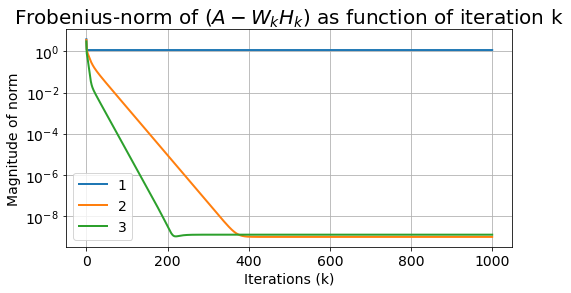

Matrix


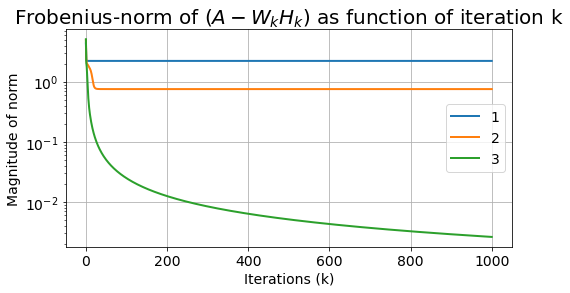

In [9]:
def plot_norm_as_function_of_iterations(matrices, ds, max_iter=1000):
    '''
    Plots the frobenius norm of A-WH, A being a matrix 
    and W,H being the results of the NMF algorithm utilized on A
    as a function of the iterations used in NMF-algorithm
    
    input:
        A : Matrix to NMF
        ds : Array of d's to be used in NMF
    '''
    
    iterations = range(max_iter+1)

    for matrix in matrices:
        for d in ds:
            W, H, norms = NMF(matrix, d, getNorms=True)
            plt.semilogy(iterations,norms)
        print("Matrix:", matrix)    
        plt.title(f'Frobenius-norm of $(A-W_kH_k)$ as function of iteration k',size = 20)
        plt.legend(ds)
        plt.xlabel("Iterations (k)")
        plt.ylabel ("Magnitude of norm")
        plt.show()
plot_norm_as_function_of_iterations([A3,A4],[1,2,3])

As we can see from above, there is a strong tendancy for convergence in both plots. The convergance is incredibly fast for d=1, although the norm is significantly larger. We can see that the magnitude of the norm is monotonely non-increasing, and there is therefore no doubt that equation 17 holds for all cases. 
We also see that the convergance for d=2 is much quicker and has a more favorable (lower norm) value than d=3 for $A_3$. We conclude this is because, like discussed above, $rank(A_3) = 2 \neq 3$. Therefore the matrix contains redundant information. This redundant information may propagate for every iteration, making the convergance slower.

## Task 2
We take our first steps towards practial use. Our goal is to find the basic traits and hidden information of the characters in the NFT "Cryptopunks" using the NMF algorithm implemented in task 1. We will see how the results depends on the parameters we decide to use in the NMF.

### Task 2a)
We will now introduce the handed out code for importing at plotting images from the imgs file.

In [10]:
#%pip install opencv-python # Required to import cv2 !!!
import cv2
import os
import time

In [11]:
# Code copied directly from given notebook
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)

(24, 24, 4, 500)


In [12]:
# Code copied directly from given notebook
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

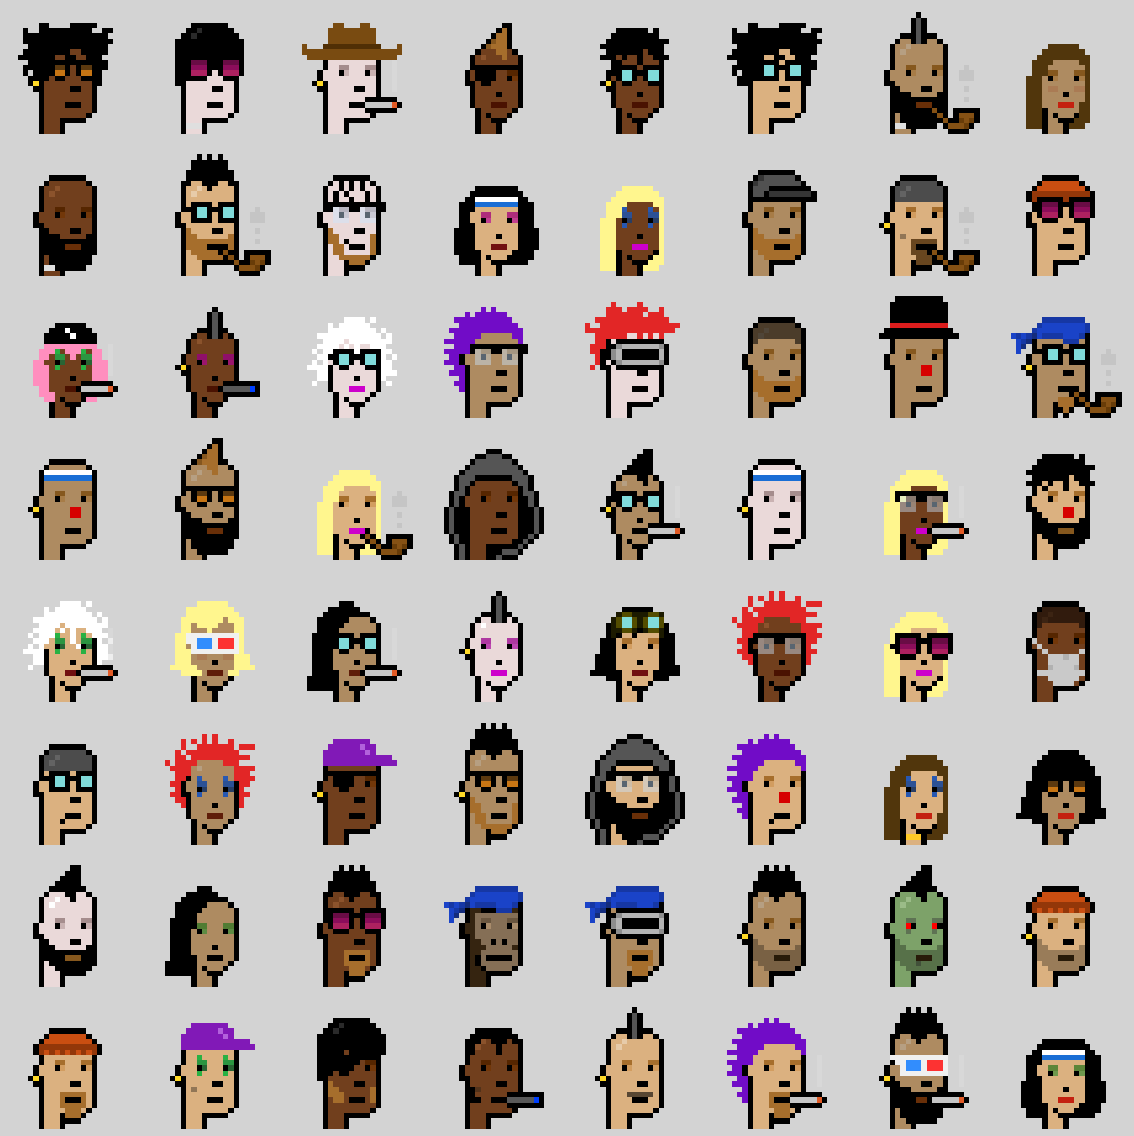

In [13]:
# Example of plotting 8 times 8 images stored in "faces"
plotimgs(faces, 8)

Above we can see an example plot of 64 CryptoPunks, using the given code for image plotting and loading. All the CryptoPunks are different, but there is no doubt that there are some similarities. We will study this further on in this project.

### Task 2b)
Further on we will look at the distinct channels of the RGBA images, and discuss what we can get out of the image set by looking at the mean channel-values of all the images.

In [14]:
# These images will be used for further tasks!

# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

In [15]:
mean = np.mean(faces,axis = -1)

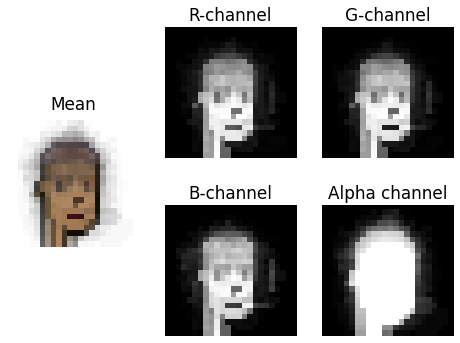

In [16]:
# Plotting
fig = plt.figure(figsize=(8, 6))

ax0= fig.add_subplot(1,3,1)
ax1= fig.add_subplot(2,3,2)
ax2= fig.add_subplot(2,3,3)
ax3= fig.add_subplot(2,3,5)
ax4= fig.add_subplot(2,3,6)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

ax0.title.set_text("Mean")
ax1.title.set_text("R-channel")
ax2.title.set_text("G-channel")
ax3.title.set_text("B-channel")
ax4.title.set_text("Alpha channel")

ax0.imshow(mean)
ax1.imshow(mean[:,:,0],cmap = "gray")
ax2.imshow(mean[:,:,1],cmap = "gray")
ax3.imshow(mean[:,:,2],cmap = "gray")
ax4.imshow(mean[:,:,3],cmap = "gray")

plt.show()

In [17]:
#Position of elements in Alpha channel with no opacity
print("Amount of positions in mean Alpha channel with no opacity: ",len(np.argwhere(mean[:,:,3] == 0)))

Amount of positions in mean Alpha channel with no opacity:  166


In the sub-plots above we can see 5 images. These are marked mean and the 4 channels independantly. We do not get much information for looking at the R, G and B channels, but the alpha channel and the mean image gives us a lot of information about the what a general image would look like.

We can clearly see from the main image that the 500 random images we have taken the mean of consists of faces! This isn't particularly surprising, but it gives us an idea of how the faces are placed in an image. Based on the results we can conclude that there are very few (or none) images not containing a face facing rightwards and placed in the middle. However the mean image does not reveal any of the traits and features of each CryptoPunk, this is to be expected since we assume that the CryptoPunks are similar, but they should have a unique look.

We interpret "no opacity"(could mean transparant(opacity = 0) or opaque) as transparant pixels, since these would be equavivalent to RGB-value equal to zero. Above we have printed the amount of positions in the Alpha-channel for the mean image with complete transparancy. This would indicate the pixels which do not yield any information, but are just represented as the background color. From the plot of the mean alpha channel, it is reasonable to belive that most transparent pixels are positioned around the faces towards the edges, since we do not have any features of the images around this area. 

We know from linear algebra (MA1201/MA1202) that we cannot have a rank higher than the lowest number of the amount of columns and rows. For our images we have a 24x24 matrix for each image and for each channel, but we do have alot of transparent cells towards the edges of RGBA-image. It is reasonable to belive that all the rows for the first $z$ columns and the last $y$ columns are completly transparent, and thus can be expressed as a linear combination of the rest (with coeffisiant equal to 0). This leads to the fact that we could fit all our useful data from the mean image in a smaller matrix 24x(24-z-y). We could probably do the same mindset for the rows, but it is reasonable to belive that we have more "deadspace" (full zero columns/rows) in the columns. Since we now can imagine that we have reduced our datasize, we also reduce the possible values of the rank. Since the amount of columns now only are 24-x-y, which is clearly less that 24 for x,y greater than zero, the rank of the matrix can't exceed 24-x-y. This indicates that all the matrix-images have alot of useless deadspace, which directly makes an impact on the rank of the matrix containing the images.

### Task 2c)
We will now do our first NMF-simulation of an image file. Here we will look at the columns of W, where we will find the features of the CryptoPunks!

In [18]:
d = 64
W,H,Norm = NMF(faces_reshaped, d)

W_reshaped = W.reshape((24,24,3,64))

for i in range(d):
     W_reshaped[:,:,:,i] /= np.max(W_reshaped[:,:,:,i])

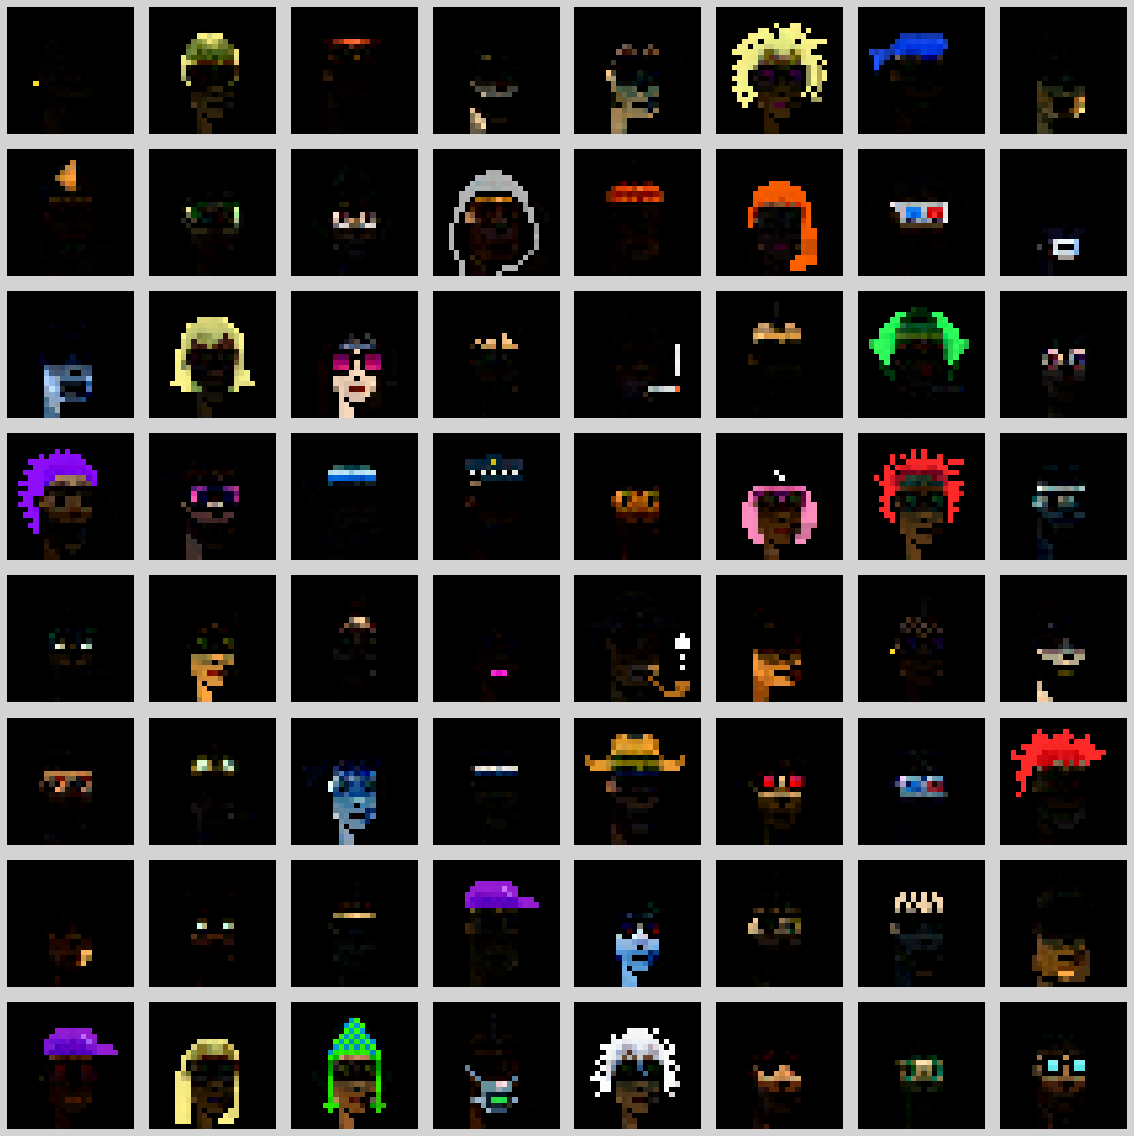

In [19]:
plotimgs(W_reshaped, nplot = 8)

Above we have plotted the resulting W after running the Lee and Seung's NMF algorithm. We can clearly see what the algorithm has done to the system. It has kind of high-lighted the different kinds of elements contained in a typical CryptoPunk. This fits really good with the Movie-example given in the project, whereas we could see the tendencies clearly in W.

Further on we wanted to see if there are any major changes with a lower d, and a greater d. We chose the values d = 36 and d = 144, which is about half the size and twice the size. These may seem like strange numbers, but we chose them because these are the squares of 6 and 12, making it easier to plot using the exsisting plotting code.

In [20]:
#Test for d = 36 & d = 144
#Values are squares making it possible to use the excisting plotting code

d = 36
W1,H1,Norm1 = NMF(faces_reshaped, d)

W_reshaped_36 = W1.reshape((24,24,3,36))
for i in range(d):
    W_reshaped_36[:,:,:,i] /= np.max(W_reshaped_36[:,:,:,i])
    
d = 144
W2,H2,Norm2 = NMF(faces_reshaped, d)

W_reshaped_144 = W2.reshape((24,24,3,144))
for i in range(d):
    W_reshaped_144[:,:,:,i] /= np.max(W_reshaped_144[:,:,:,i])


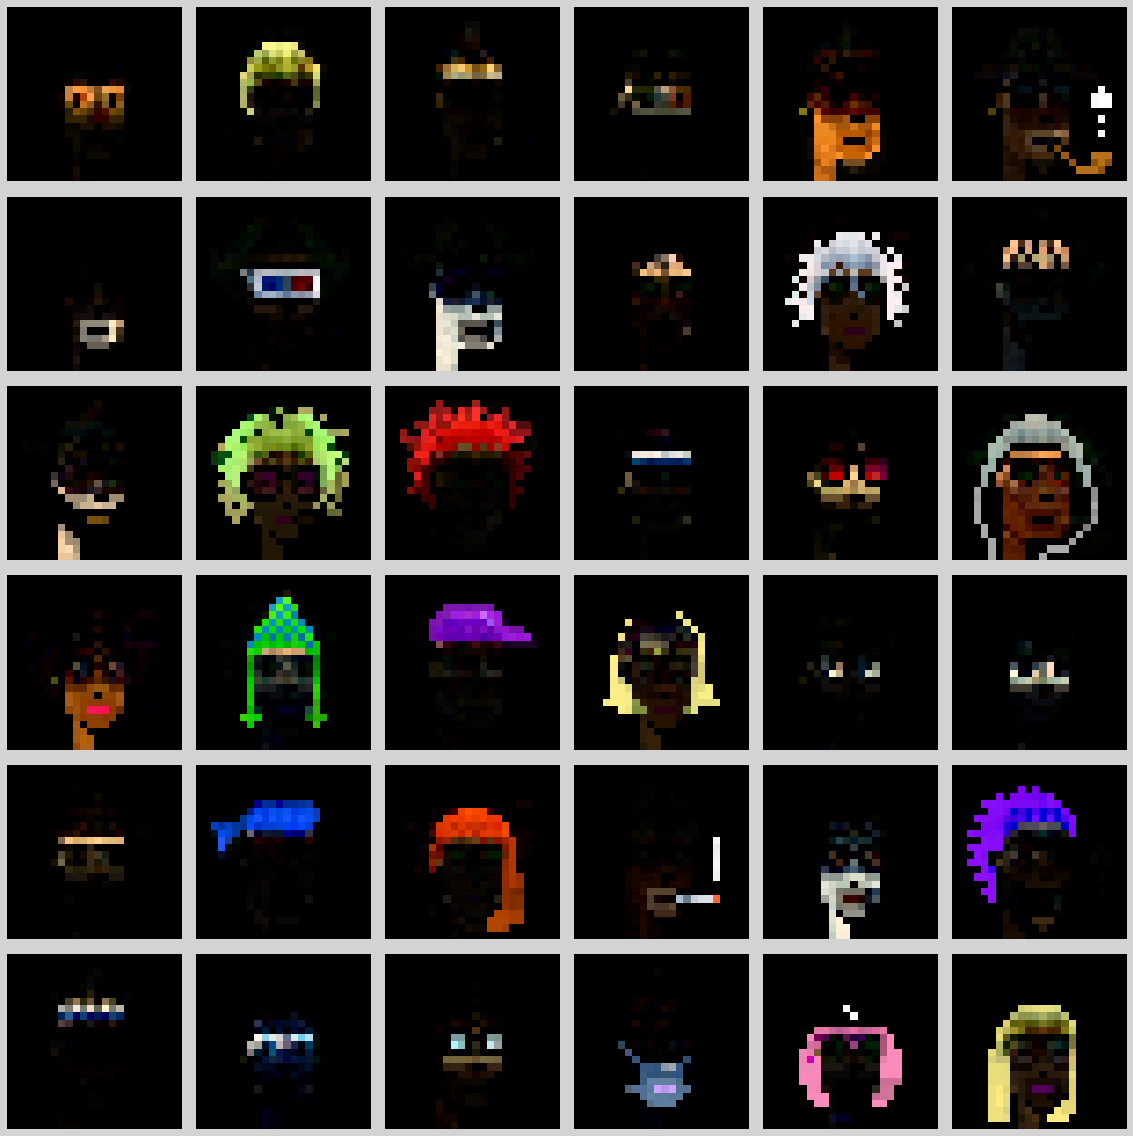

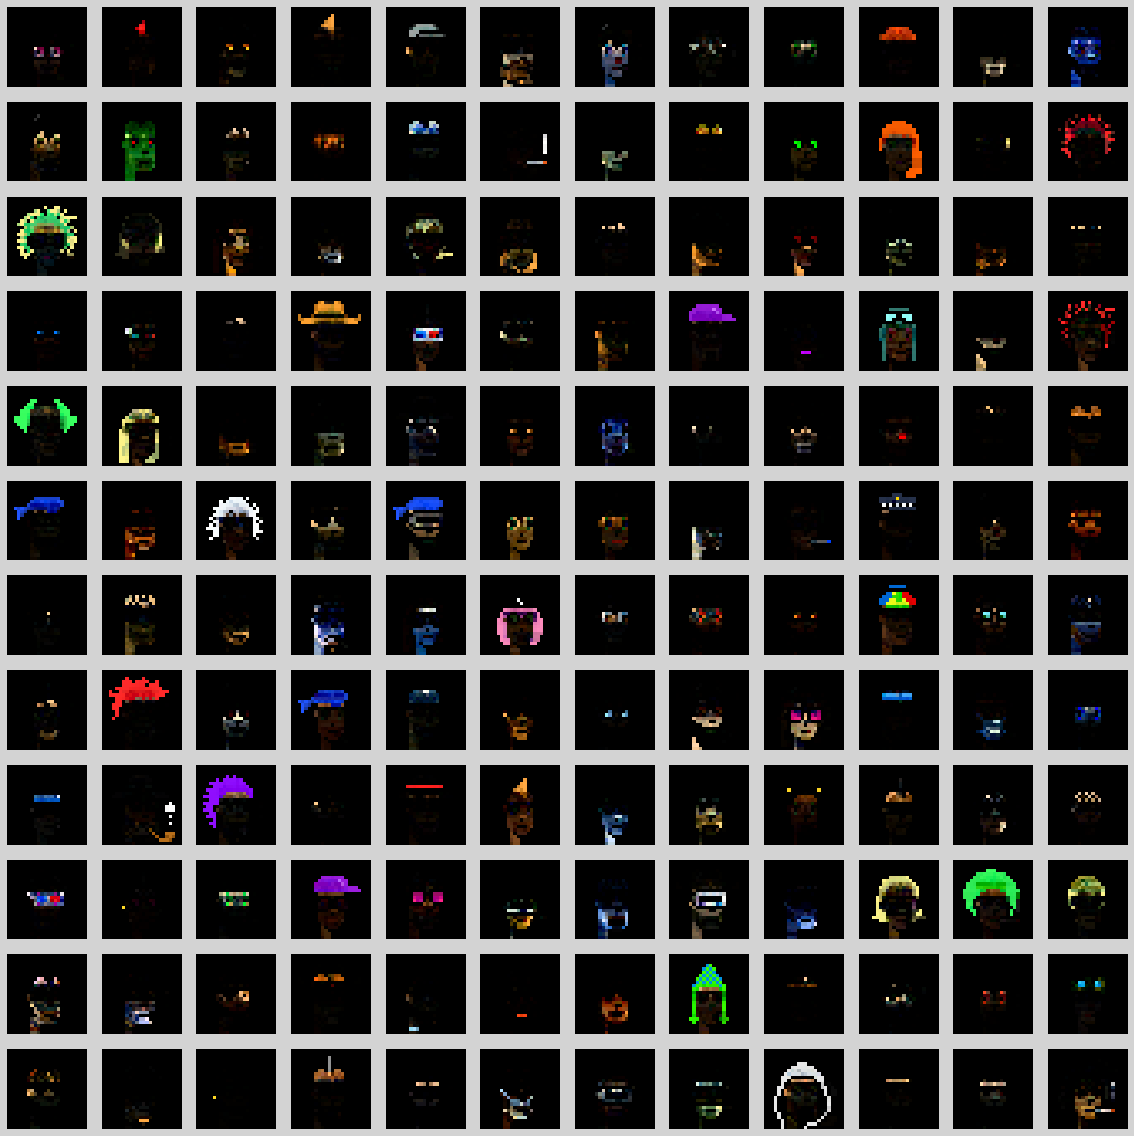

In [21]:
plotimgs(W_reshaped_36, nplot = 6)
plotimgs(W_reshaped_144, nplot = 12)

As of the results above, there are a few differences from d = 64. The first thing we can notice is that fact that for d = 36, the features in a frame is more general, and thus less distinct. By this we mean that there is more information per image compared to d = 64, which is to be expected since we almost halved the data to be stored. We essentially create a basis with 36 basisvectors. Each basisvector must necesserily be more information-dense in order to span the same space.  This is the problem of under-fitting, where you try too hard to generalise a set of data.

From the plot of d = 144, we can clearly see the oposite. Here we can see alot of features, which was previously too generalised for d = 36. Each feature is distinct, where the most clear part of each image (column of W) has $\underline{one}$ clear element, and some "background blur". But one of the problems using a high value of d, is that we are not guaranteed that there is enough features in the images. If we for example look at row 2 and 4 at column 12 for d = 144, we can actually see the same feature, the "red crazy hair", but with some difference. This isn't a huge problem, but it takes up space with useless information, since we basically have two really similar columns. 


### Task 2d)
From the previously calculated W and H, we will now plot the reconstruction and compare it to the original image.

In [22]:
V = W@H
V.shape

(1728, 500)

In [23]:
V_reshaped = V.reshape((24,24,3,500))

for i in range(N):
    V_reshaped[:,:,:,i] /= np.max(V_reshaped[:,:,:,i])
    
V_new_2d = np.zeros(faces.shape)
V_new_2d[:,:,:3,:] = V_reshaped
V_new_2d[:,:,3,:] = faces_opacity

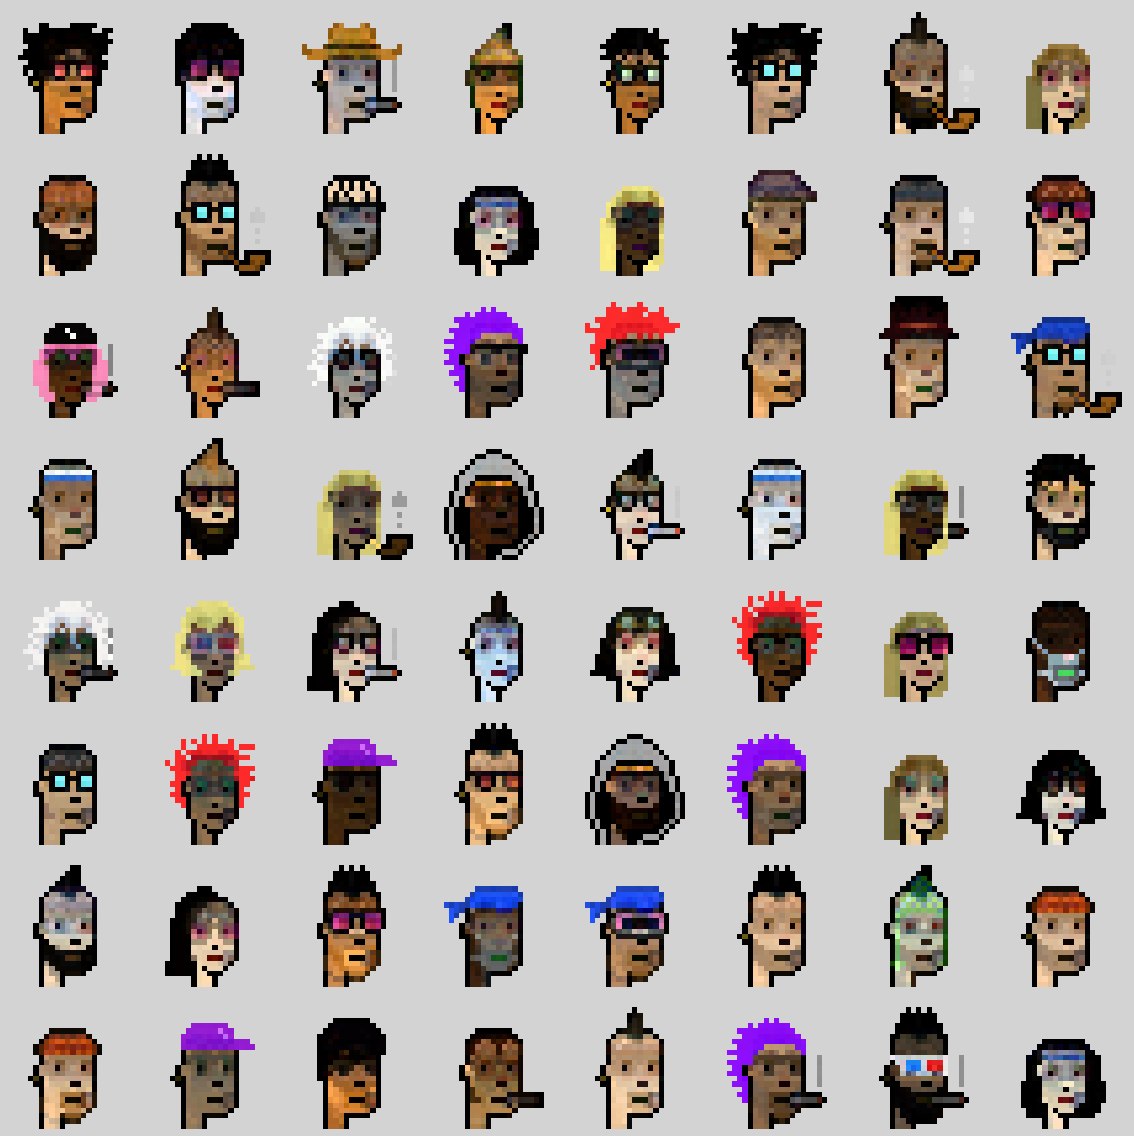

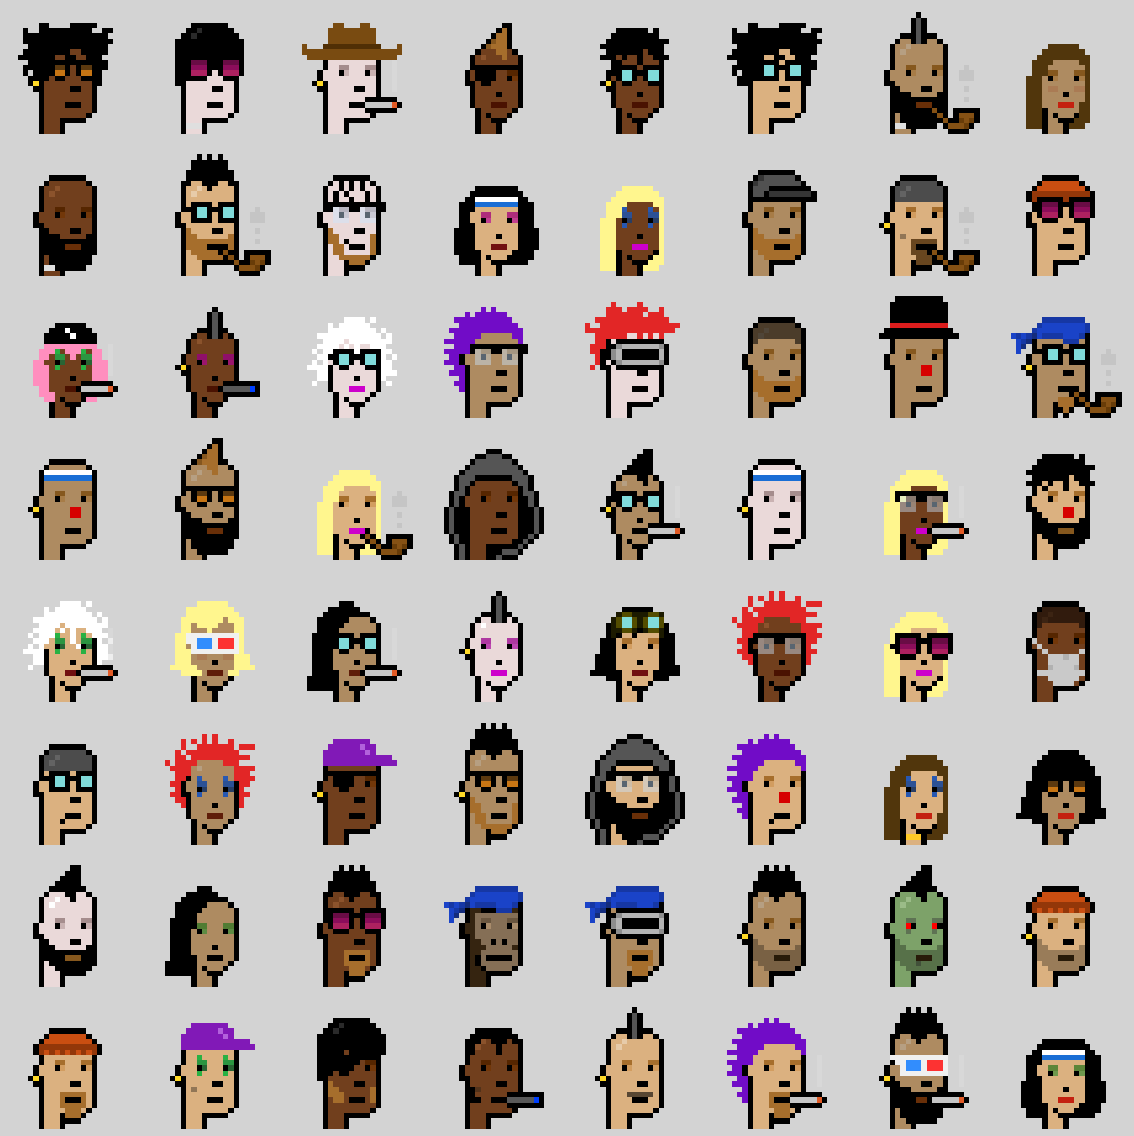

In [24]:
plotimgs(V_new_2d, nplot = 8)
plotimgs(faces, nplot = 8)

Above we can see the reconstruction $WH$ and the original image, as plotted in 2a. There is no doubt that the reconstruction is good, but there are some differences to be pointed out. The overall looks are quite good, whereas we can clearly see that the components of each CryptoPunk is conserved, but there is some noice. 

We can see some miscoloring for all the CryptoPunks, and some contrast-changes. The mismatch in general color is probably due to the fact of us clipping the images to conserve the fact that each pixel color and opacity should have a value between 0 and 1. This may also be the reason of some of the uneven colormatches.

### Task 2e)
In this sub-task we will look at how the error of the reconstruction differs as a function of the iteration number k, for three values of d, d = 16,32,64.

Matrix


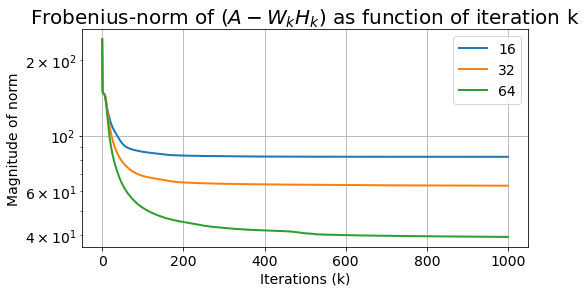

In [25]:
ds = [16,32,64]
plot_norm_as_function_of_iterations([faces_reshaped],ds)

Above we can see the error measured by the Frobenius norm of $A-W_kH_k$ as a function of k, for the three values of d; 16, 32 and 64. Since we expect that a higher number d gives a lower error (due to more information being conserved), we have gotten what we expected. We can clearly see that we have three different levels for the three d values, which gets lower with increasing d. 

It is reasonable to say that the system has reached some convergence because of the flattening of the curves, starting at aproximately k = 50-100. However there is some negative sloping of both the curve for d = 32 and d = 64, but this is incredibly flat, so the potential benefits of increasing maxiter, would probably cost much more time, than it gives us a higher degree of convergence. 

### Task 2f)
The most relevant part of the simulation is what we get as an output, and not what happens during the simulation. We will look at how the error of the final reconstruction differs as a function of d. This will be done for 8 values of d.

In [26]:
def norm_as_function_of_d(A,ds):  # Prøv å finne et bedre navn
    '''
    Plots the frobenius norm of A-WH, A being a matrix 
    and W,H being the results of the NMF algorithm utilized on A
    as a function of d
    
    input:
        A : Matrix to NMF
        ds : Array of d's to be used in NMF
    '''
    reconstruction_norms = []
    
    time0 = time.time()
    
    for d in ds:
        W,H,Norm = NMF(A, d)
        reconstruction_norms.append(np.linalg.norm(A-np.dot(W,H), 'fro'))
    
    print("Total runtime in seconds: ",time.time()-time0)
    
    plt.plot(ds,reconstruction_norms, marker='o', label=r'$|A-WH|_F$')
    plt.title('Frobenius norm of A-WH as a function of d')
    plt.xlabel('d')
    plt.ylabel('Magnitude of norm')
    plt.legend()
    plt.show()

Total runtime in seconds:  331.20160031318665


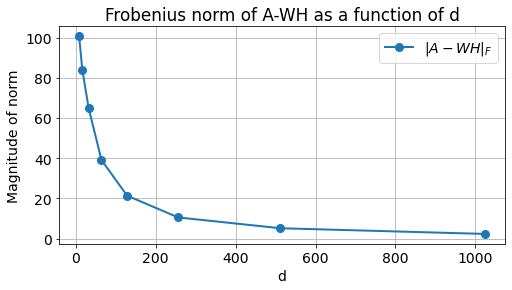

In [27]:
ds = [8,16,32,64,128,256,512,1024]
norm_as_function_of_d(faces_reshaped, ds)

Above we can see a plot of how the error changes as we increase the value of d. The plot is plotted with a dash-dotted line, so that we can easily see where our datapoints are, but also get to see some kind of visualisation of a tendency. The values d were chosen as a doubling of the previous value, starting at d = 8, and ending at d = 1024. The amount (8) of values were chosen of what gave us a good visualisation compared to the time spent. The simulisation of these 8 values of d took about 5 minutes, which is good compared to the benefits of the amount of d's.

It is clear that there is a decrease of final error for an increasing d. The tendency for convergence is obvious, whereas the final error decreases drastically for higher values of d. This also looks the same for when we did the similar experiment in the previous task, where we looked at the error as a function of k for d = 16, 32 and 64. Which is a good thing, considering these three values of d are three of our eight data points.

# Task 3
In this task we examine another advantage of the NMF - the removal of useless information. Useless information, or *noise* is practically everywhere. Images often has unwanted pixels, audioclips will capture things like wind, and telescopes will also measure background radition. In this task we will deliberatly add noise in the form of gaussian blur to our dataset (images) and see how the NMF-algorithm handles it. Will the useless data propegate and magnify, or will it disapear entirely?

### Task 3a)
We use the handout code to add noise to the RGB channels of the images. We then combine these noisy RGB-images with their original Alpha channel (opacity channel), and plot them in comparison to the originals.

In [28]:
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces

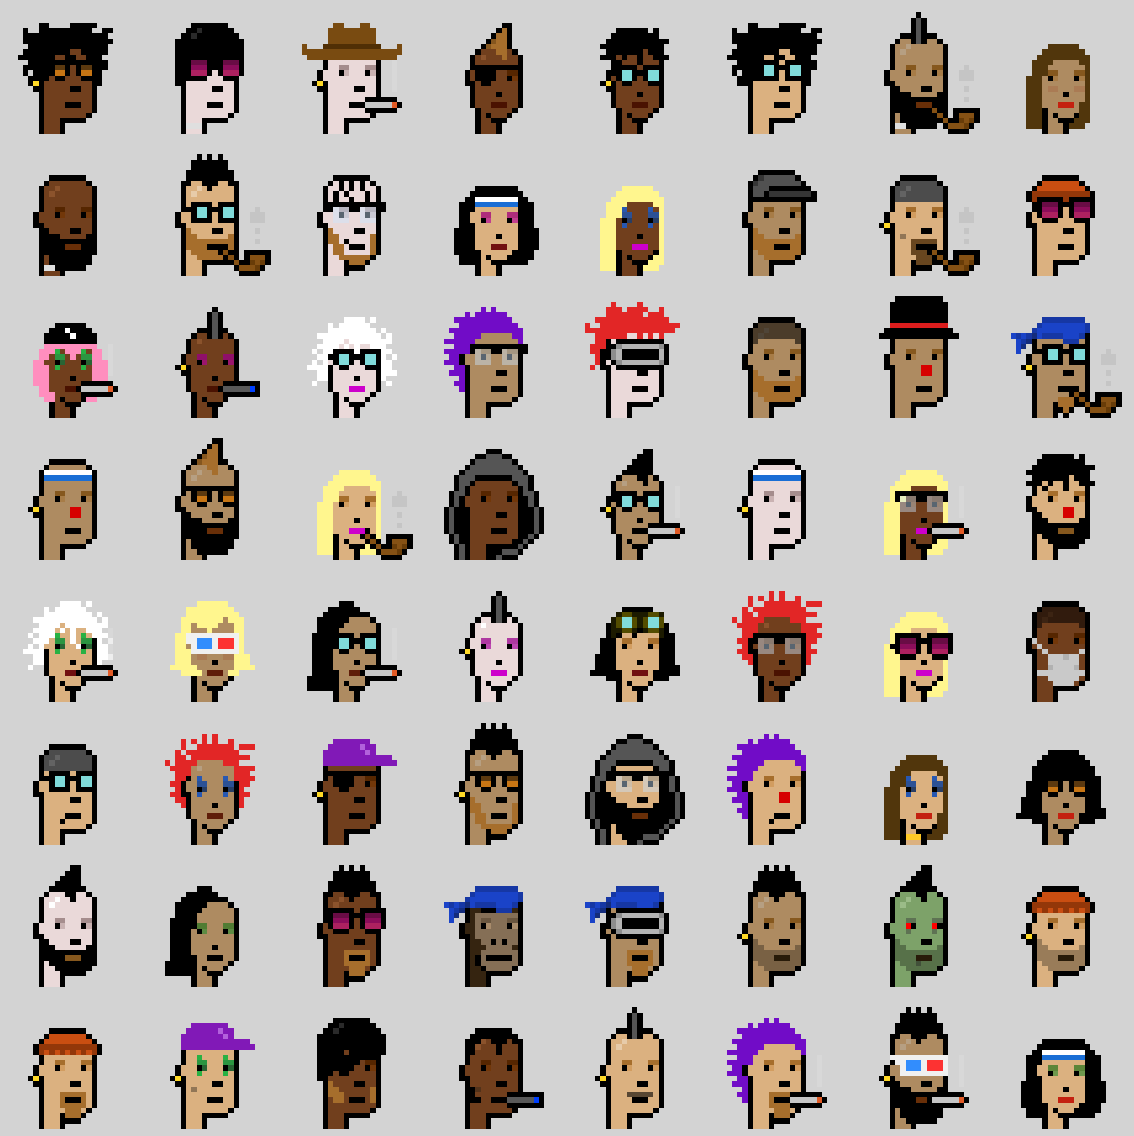

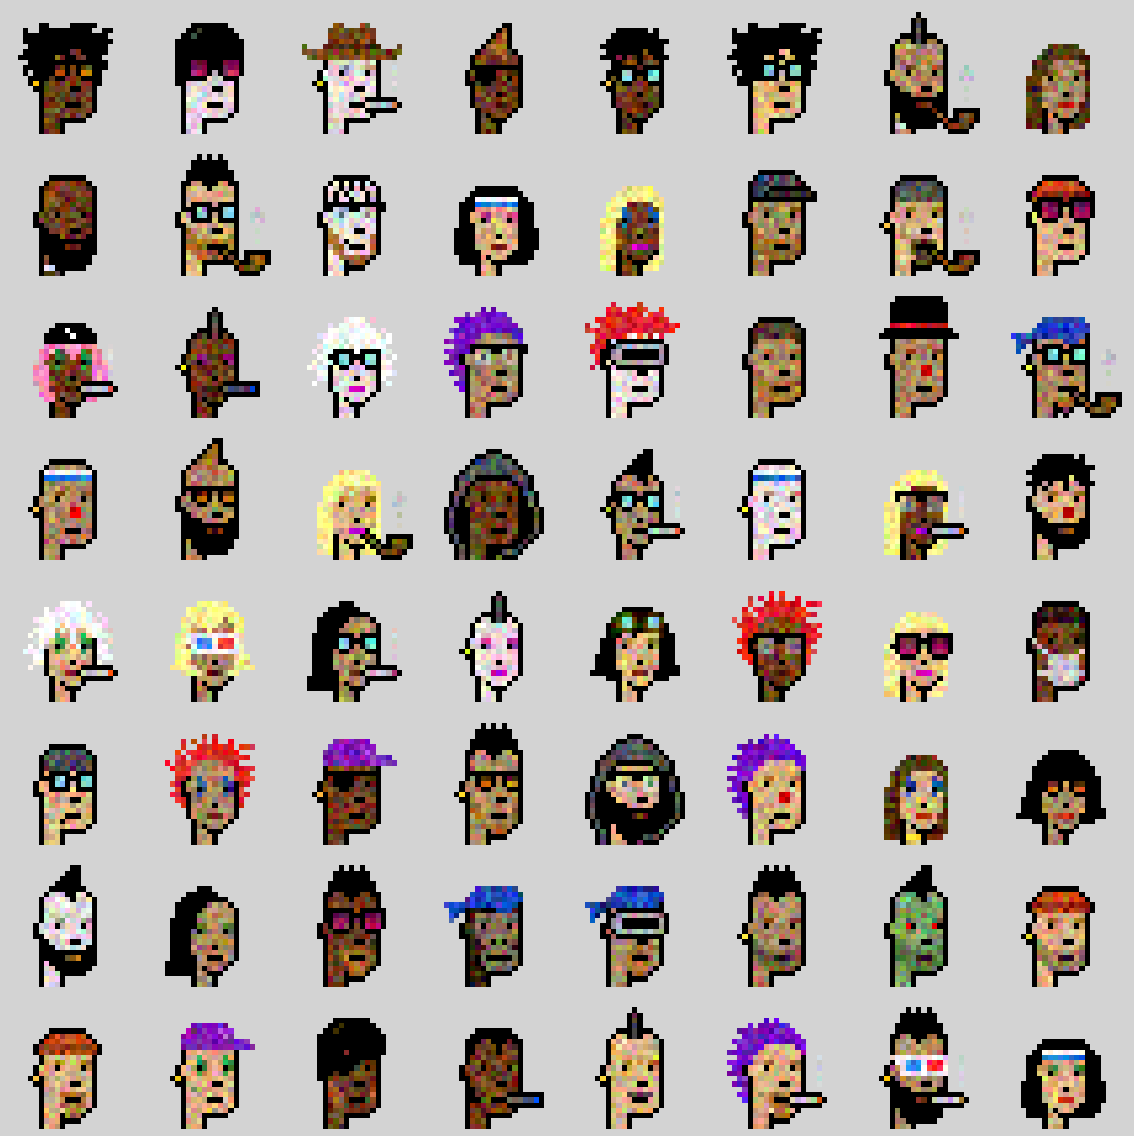

Noisy-Original Norm =  42.12610639714772


In [29]:
noisy_faces = add_noise(faces_reshaped)

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped,'fro')

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity

#plotting images
plotimgs(faces)
plotimgs(noisy_faces_with_opacity)

print("Noisy-Original Norm = ",noise_residual)

From the two plots above, we can see the original images and the noisy image belove. We can clearly see distortion in the noisy images. We used the Frobenius-norm to calculate the difference between the RGB-image with and without the noise, ||𝐴𝑛𝑜𝑖𝑠𝑦−𝐴𝑜𝑟𝑖𝑔𝑖𝑛𝑎𝑙||F , and got the value 42 as printed by the code. Concidering the large amount of elements in the image and the way the frobenius norm works, this is not a particulary large number, which we shouldn't expect since we chose $\sigma$ to be 0.1.

### Task 3b)
We will now redo some of what we did in task 2. We are going to look at the resulting columns of W containing the traits after running NMF-simulations on the noisy images. We are going to look at how this compares to the columns of W which we got for the non-noisy images.

In [30]:
#Calculates W, H and ||A-WkHk||_F
d = 64
W,H,Norm = NMF(noisy_faces, d)

In [31]:
#Reshaping and Clipping of the images
W_reshaped = W.reshape((24,24,3,64))
for i in range(d):
    W_reshaped[:,:,:,i] /= np.max(W_reshaped[:,:,:,i])

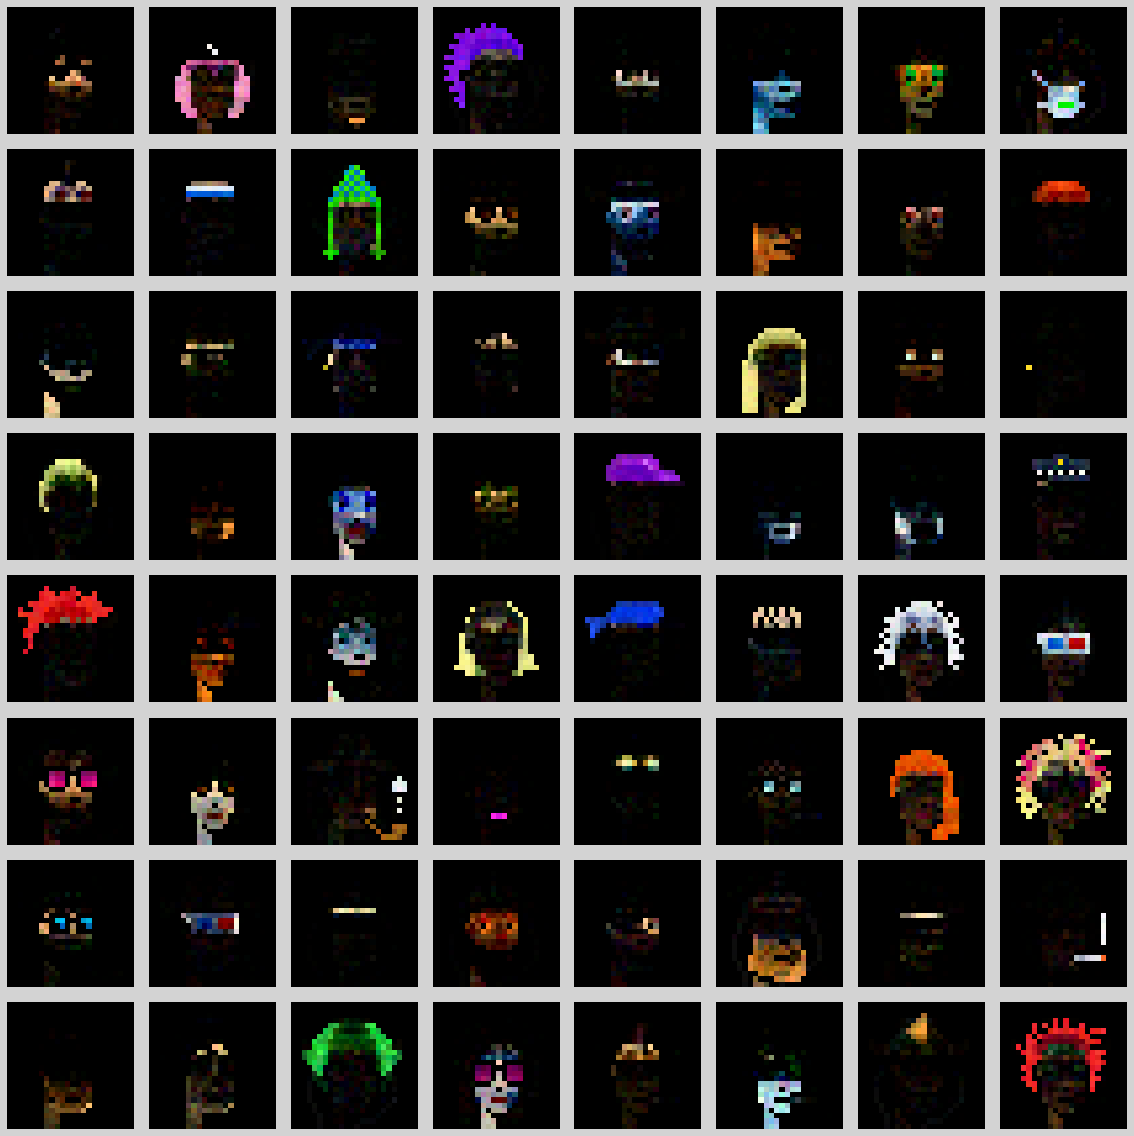

In [32]:
plotimgs(W_reshaped, nplot = 8)

Above we can see the calculated columns of W for the 500 images with d = 64. We can clearly see that the algorithm has done a similar job to what was done in task 2, but there are some differences. First of all we should point out that we do not expect to get the exact same image of W just with added noise, since W is not unique. But we should see some similarities, which we do! We can clearly see that the resulting W contains the unique elements which we find in the original images. The noise is overall hard to see in each element, which is expected, but there is some miscoloring and non-continuty in the colors of some elements.

We will now plot the reconstructions!

In [33]:
#Combining W and H
V = W@H
V_reshaped = V.reshape((24,24,3,500))

for i in range(N):
    V_reshaped[:,:,:,i] /= np.max(V_reshaped[:,:,:,i])

V_new_3b = np.zeros(faces.shape)
V_new_3b[:,:,:3,:] = V_reshaped
V_new_3b[:,:,3,:] = faces_opacity

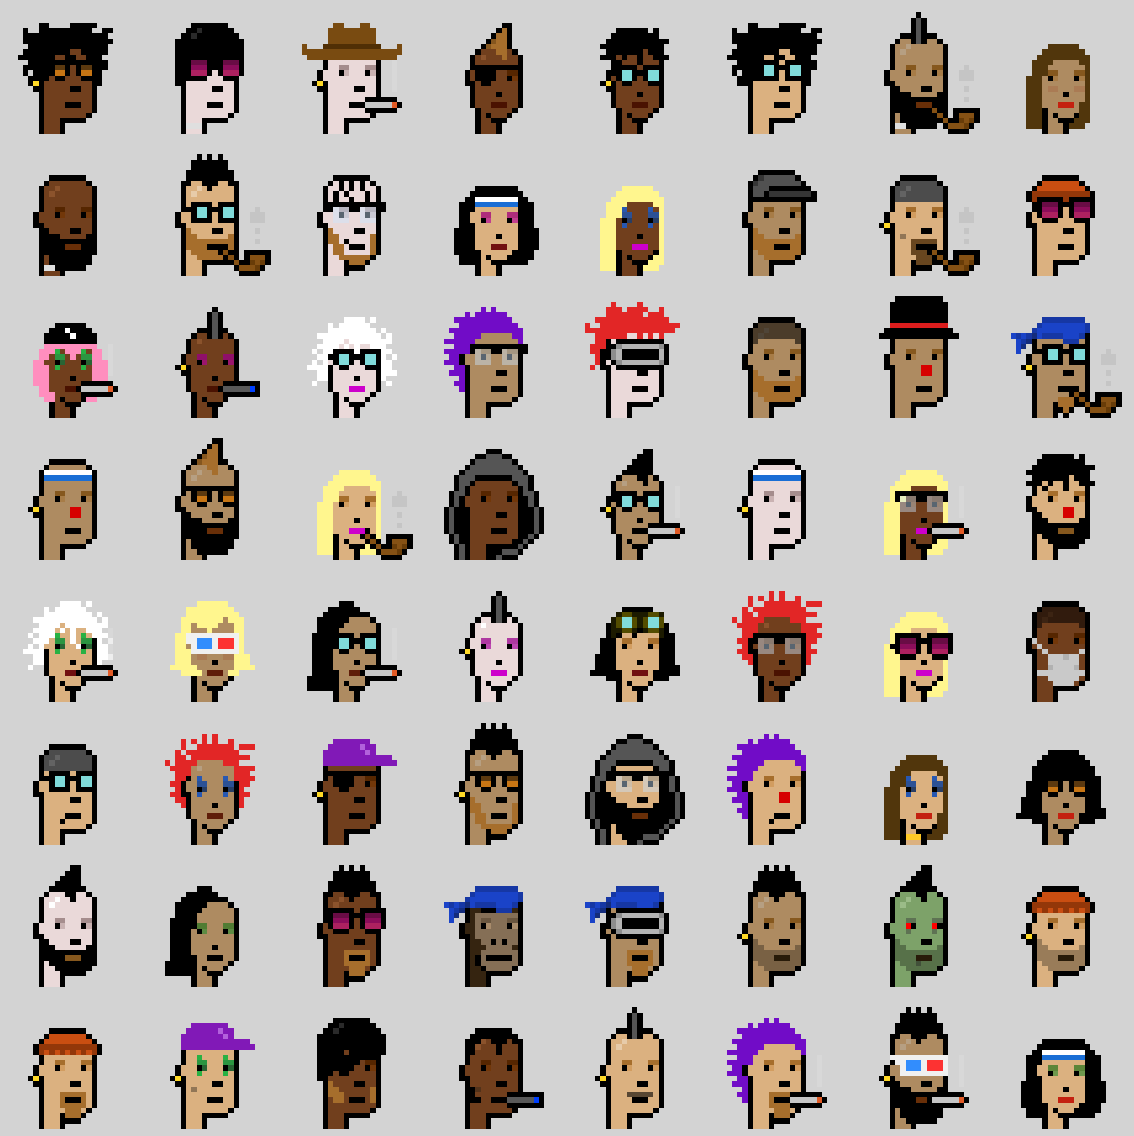

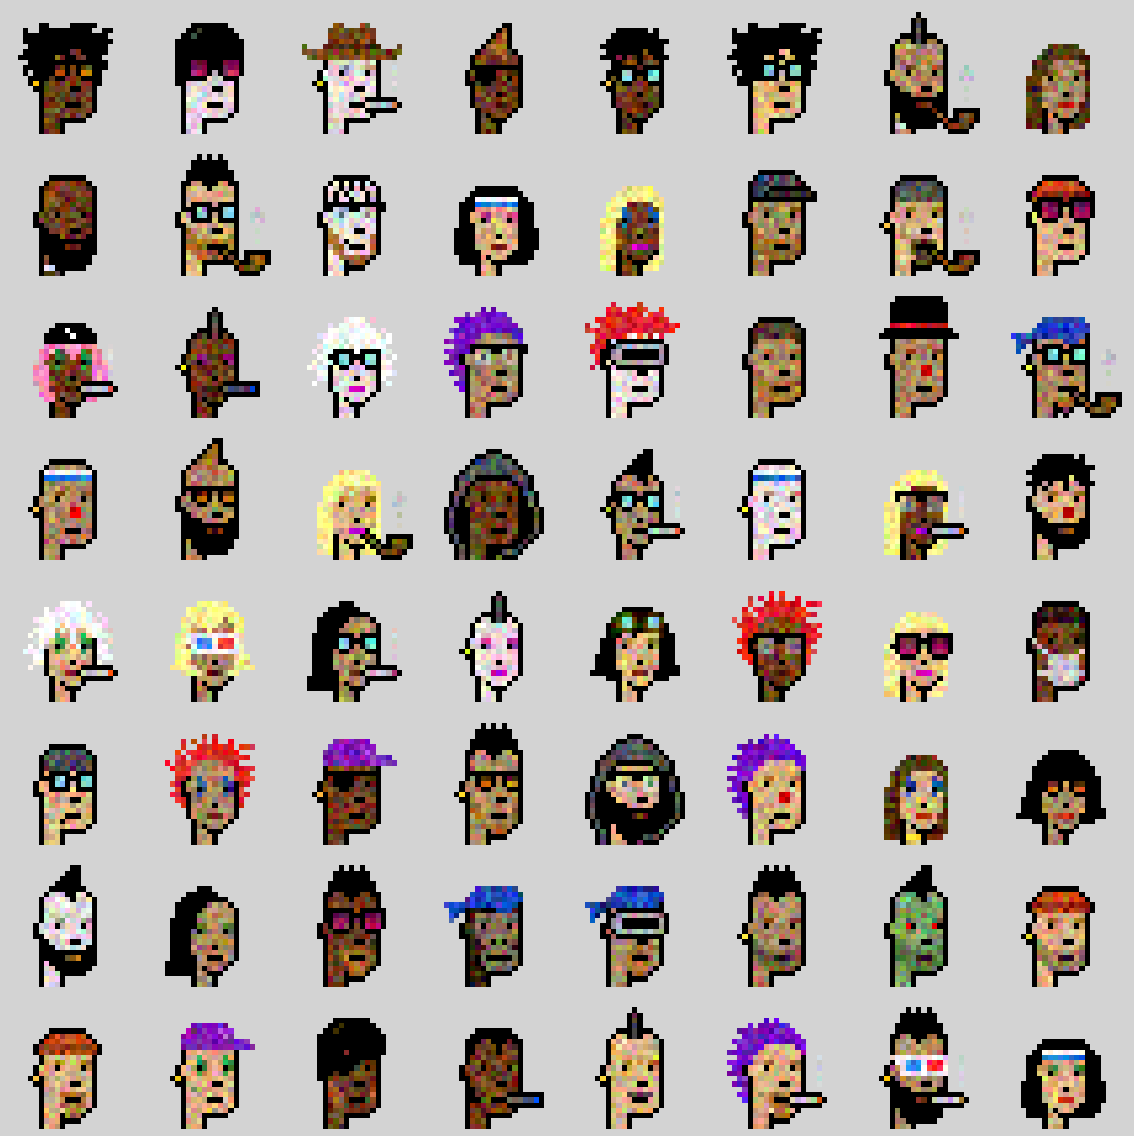

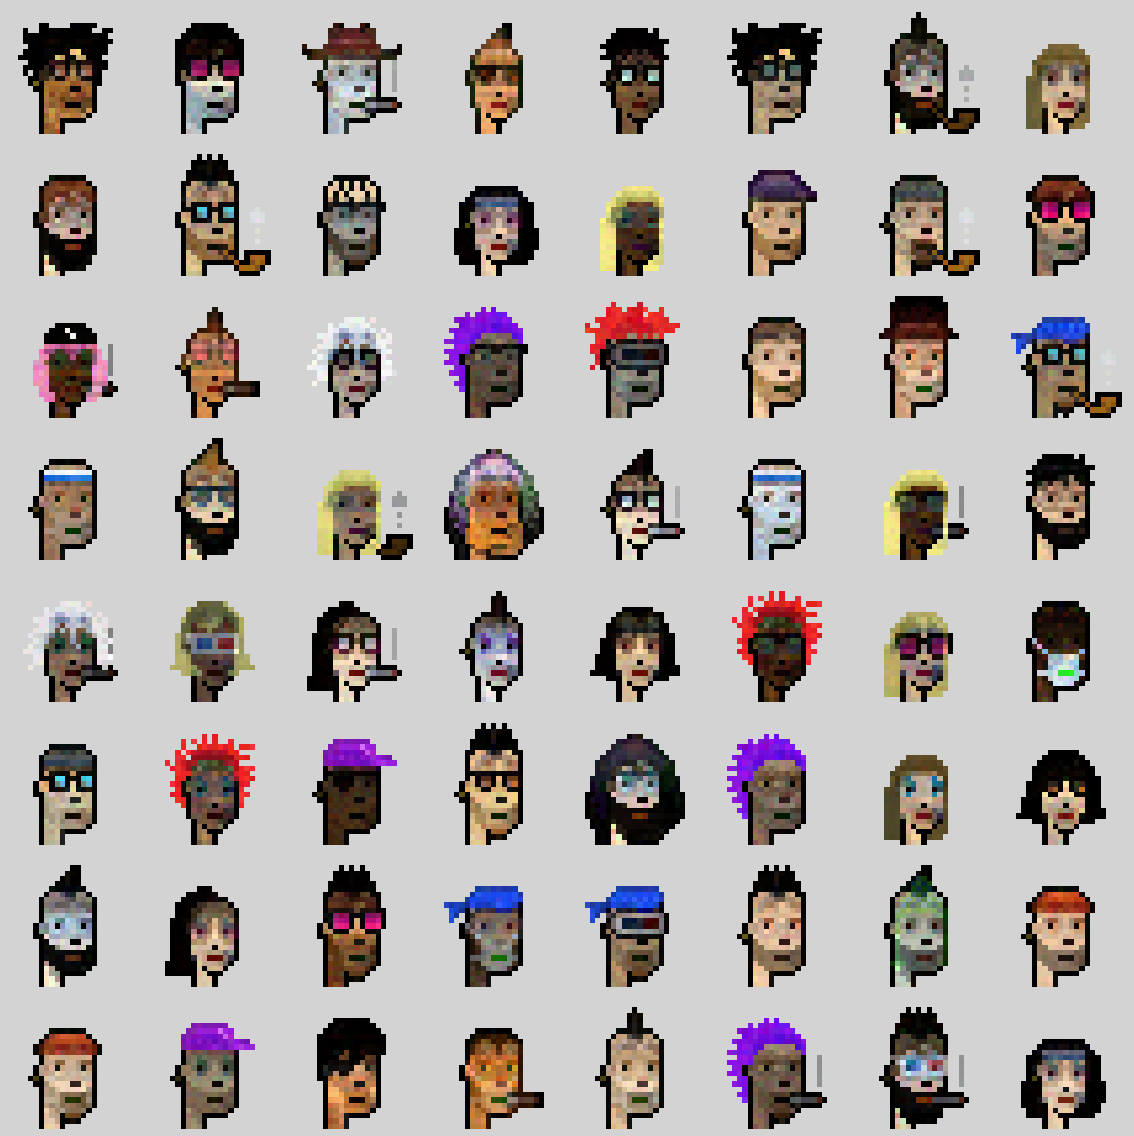

In [34]:
#plots the images; originals, noisy and reconstructed
plotimgs(faces,nplot = 8)
plotimgs(noisy_faces_with_opacity, nplot = 8)
plotimgs(V_new_3b, nplot = 8)

Above we can see a plot of the original images, the noisy images and the reconstruction of  𝑊𝐻 .

We can clearly see that there is noise added in image number two, this we can see as pixelated miscoloring. Image number one and two, is the exact same as which we plotted previously, but we thought it might be good too have them close to each other so that it is easier to compare them.

There is no doubt that the reconstruction is quite good. We do see some changes to the CryptoPunks, but they are minimal. The noise has been significantly reduced, but we do have som miscoloring. We do expect the algortihm to not give us a perfect reconstruction, which may be some part of the miscoloring. Some of the miscoloring, probably comes from the way we have clipped the image colors as mentioned in task 2. This is overall not a large issue, since the perfect colormatch is not the most important part.

The algorithm has also done some good work in removing noise from the noisy image. If we ignore the general miscoloring, we can clearly see that most of the previously noise has been smeared, making the clearly dotted noise more faded. This isn't done to perfection, where we can't see it at all, but to a degree where the images looks way less pixelated. We do though see a problem for the images containing similar colors, for example the images containing only dark colors like the hooded CryptoPunk in row 4 column 4. The problem here is that the algorithm seems to "mistake" the similar colors as noise, and smears out the colors giving us a non-representative reconstruction. For the images with distinct and constrasted colors we do not experience the same.

Comparing our reconstruction to the reconstruction we did in task 2, we can clearly see that we have gotten a good result in the noise-reduction aspect. All the elements are preserved, but we do have the extra awfull miscoloring in the noise-reduced image. The colormatching of the reconstruction from task 2 is also off, but in the same matter as we can see here, this strengthens our belief that some of the miscoloring has its roots in the clipping of the colorchannels.


### Task 3c)
Simliarly to task 2f, we will now look at how the final reconstruction error changes as a function of d. Since we made a generall plotting code for task 2, we will have to run a new simulation of 2f but we expect the overall results to be the same as previously plotted. This gives us a significantly longer runtime, enough for an extra coffe break:).

In [35]:
#Parameters
d_vals = [8,16,32,64,128,256,512,1024]
delta = 1e-9
maxiter = 1000

#Array containing zeros, to store the final error
Error_noisy = np.zeros(len(d_vals),dtype = np.dtype('f8'))
Error_2F = np.zeros(len(d_vals),dtype = np.dtype('f8'))

#Sets a begin time, to check how long the runtime was
time0 = time.time()

#Iterates through all vales of d
for i in range(len(d_vals)):
    W_n,H_n,Norm_n = NMF(noisy_faces, d_vals[i], delta, maxiter)
    Error_noisy[i] = np.linalg.norm(W_n@H_n-faces_reshaped,'fro')
    Error_2F[i] = NMF(faces_reshaped, d_vals[i], delta, maxiter)[2][-1]
    
#Prints total runtime in seconds
print("Total runtime in seconds: ",time.time()-time0)

Total runtime in seconds:  675.5971276760101


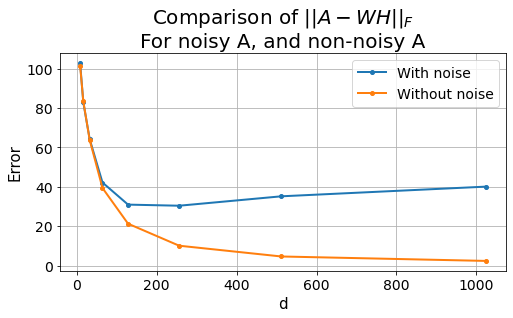

In [36]:
#plots the comparison of error for the reconstruction of A_noisy and A
plt.figure()
plt.title(f'Comparison of $||A-WH||_F$ \nFor noisy A, and non-noisy A',size = 20)
plt.xlabel("d",size = 15)
plt.ylabel("Error", size = 15)
plt.plot(d_vals,Error_noisy,".-")
plt.plot(d_vals,Error_2F,".-")
plt.legend(["With noise","Without noise"])
plt.show()

Above we can see a comparison of the error when WH is a reconstruction of the non-noisy and noisy A. It should be pointed out that A is the original reconstructed image, but WH is the reconstruction of the noisy and the non-noisy. 

We see a major difference in behaviour from the two different setups. The noiseless setup drops drastically and seems to converge towards zero for higher values of d. We do not see the same tendancy for the setup with noise. Here we can see that the error seems to follow the noiseless setup to some value of d (around 100), but flattens out and even increases for higher values of d.

For the noiseless systems, we expect the error to decrease for increasing values of d. But the problem with the noisy systems are that once we get a high enough value of d noise is added as a "feature" for the CryptoPunks. This means that we expect the error to increase, since the noise added gives us a greater differense from the original images matrix A. This is a problem of overfitting were we try to fit the data to more "variables" then there are.

When we try to fit data, it is important to try to fit it in a best way possible (duuh). For this case, if we choose a too low value for d we will get an significantly large error, since we try too hard to generalise the different images. This is a problem of underfitting as we bearly mentioned in task 2. The resulting columns of W gets too generalise, leading to a reaconstruction where we may get "new" features on our original CryptoPunks. Similiarliy we can't choose a too high value of d as mentioned above, since this leads to overfitting for the noisy image systems. Therefore we should choose a value of d, which gives us the best representation, where we do not over- or underfit!

Looking at the results above, we may conclude that our optimal d should lie somewhere between 128 and 256. According to the result the minimum of the error of the noisy system should lie somewhere in this intervall. We will take it a step further, and look at the error of 9 new values in this intervall. By doing this, we will probably get a more exact value of the most suitable d.

In [37]:
#Parameters
d_vals = np.linspace(128,256,9,dtype = np.dtype('i2'))
delta = 1e-9
maxiter = 1000

#Array containing zeros, to store the final error
Error_noisy_extra = np.zeros(len(d_vals),dtype = np.dtype('f8'))

#Sets a begin time, to check how long the runtime was
time0 = time.time()

#Iterates through all vales of d
for i in range(len(d_vals)):
    W_n,H_n,Norm_n = NMF(noisy_faces, d_vals[i], delta, maxiter)
    Error_noisy_extra[i] = np.linalg.norm(W_n@H_n-faces_reshaped,'fro')
    
#Prints total runtime in seconds
print("Total runtime in seconds: ",time.time()-time0)

Total runtime in seconds:  261.01557517051697


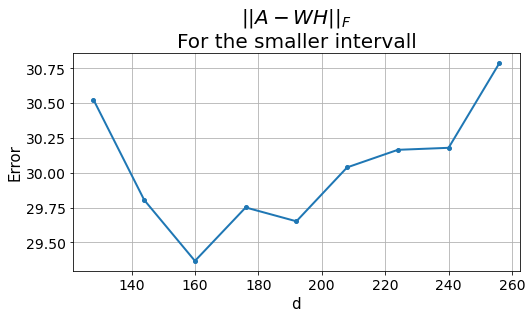

In [38]:
plt.figure()
plt.title(f'$||A-WH||_F$ \nFor the smaller intervall',size = 20)
plt.xlabel("d",size = 15)
plt.ylabel("Error", size = 15)
plt.plot(d_vals,Error_noisy_extra,".-")
plt.show()

As we can see from the adjusted experiment above, we were right about our belief that there was a minimum in the intervall [128,256] for values of d. This will probably differ some for other sets of 500 images, but the idea should be the same. It seems like we should get a minimum for values of d between 160 and 180, but these won't be general values for all images. The little peak for out value around d = 180, makes the results a little more unclear, but the plot gives us a general idea of where we would expect to find our most suitable value of d.

From the plot above, we can estimate the minimum error for the noisy system to be aproximately 29.5 (roughly). If we look at how the frobenius norm is defined, we can see if this is a huge error. If we assume (bold assumption) that A-WH is a 1728x500 matrix containing only the same element, what is the magnitude of this element considering the error to be 29.5?

The frobenius norm is defined as: $||V||_F = \sqrt{\Sigma\Sigma |v_{ij}}|^2 $. If we set $||V||_F = 29.5$ and substitute the summations to be $1728 \cdot 500 \cdot x^2$, here we are using the assumption mentioned above. This gives us the equation: $|x| = \frac{29.5}{\sqrt{1728 \cdot 500}}$, which has the solution $|x| \approx 0.032$. This is not a huge number, implying that the NMF-algorithm has done well in reducing the noise considering the fact of the forbenius norm not being the best norm to use, when we have miscoloring!

# Conclusion
In conclusion, we were able to verify and test the theory. We produced a very promosing reconstruction of the images after utilizing NMF, even after having reduced the datasize tremendously. Running simulations for many different NMF-parameters, we were able to see some relationships not obvious by simple inspection, such as the d-dependencies and number of adequate iterations.

In task 3 we looked at the reconstructions and errors from running the simulation on images with added noise. This gave us good results where we could see that the pixelated noise was "smeared" out, which gave the images an overall good look. Though it should be mentioned that there were some issues with images where the differ in color was low. With these pictures we would get a resulting image which was way off from the original, but this may also have some roots in the clipping of the RGB-channels. Generally speaking the results were promising, and we got to see and understand how matrix factorizations could be used to reduce noise!

There is no doubt that the image processing aspect of NMF worked out great! However the huge benefit of dataminimalizing should also be mentioned! This is probably the most important feature of the NMF. Eventhough we didn't look at datastoraging in this project, there is no doubt that we reduce the amount of data by using NMF.

## Source(s)

Handed-out Project file

Numpy: Documentation for functions

3 billion Facebook-users https://datareportal.com/essential-facebook-stats